<a href="https://colab.research.google.com/github/ArunKoundinya/SoulGuard/blob/master/jupyternotebooks/DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pandarallel

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 3.1 MB/s eta 0:00:00
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16675 sha256=24d89100f54ed79002895c9516990ce153e7f385fc1c3b1c11c440dc71d1f151
  Stored in directory: /root/.cache/pip/wheels/50/4f/1e/34e057bb868842209f1623f195b74fd7eda229308a7352d47f
Successfully built pandarallel


In [4]:
from google.colab import drive
import os
import pandas as pd
import numpy as np

import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from pandarallel import pandarallel
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [5]:
# Initialize pandarallel
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [6]:
SuicideDetection = pd.read_csv("https://media.githubusercontent.com/media/ArunKoundinya/SoulGuard/refs/heads/master/data/Suicide_Detection.csv")

In [7]:
SuicideDetection.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [8]:
stop_words = set(stopwords.words('english')) - { 'not', 'no', 'couldn', "couldn't", "wouldn't", "shouldn't", "isn't",
                                                "aren't", "wasn't", "weren't", "don't", "doesn't", "hadn't", "hasn't",
                                                 "won't", "can't", "mightn't","needn't","nor","shouldn","should've","should",
                                                 "weren","wouldn","mustn't","mustn","didn't","didn","doesn","did","does","hadn",
                                                 "hasn","haven't","haven","needn","shan't"}


In [9]:
def preprocess(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text into words
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    # Join the words back into a single string
    text = ' '.join(words)
    return text

In [10]:
SuicideDetection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


In [12]:
SuicideDetection['text_updated'] = SuicideDetection['text'].apply(preprocess)

In [13]:
SuicideDetection['wordlength'] = SuicideDetection['text_updated'].apply(lambda x: x.count(' '))+1

In [14]:
SuicideDetection.head()

,Unnamed: 0,text,class,text_updated,wordlength
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,ex wife threatening suiciderecently left wife ...,66
1,3,Am I weird I don't get affected by compliments...,non-suicide,weird dont get affected compliment coming some...,14
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,finally 2020 almost never hear 2020 bad year e...,13
3,8,i need helpjust help me im crying so hard,suicide,need helpjust help im cry hard,6
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,’ losthello name adam 16 ’ struggling year ’ a...,232


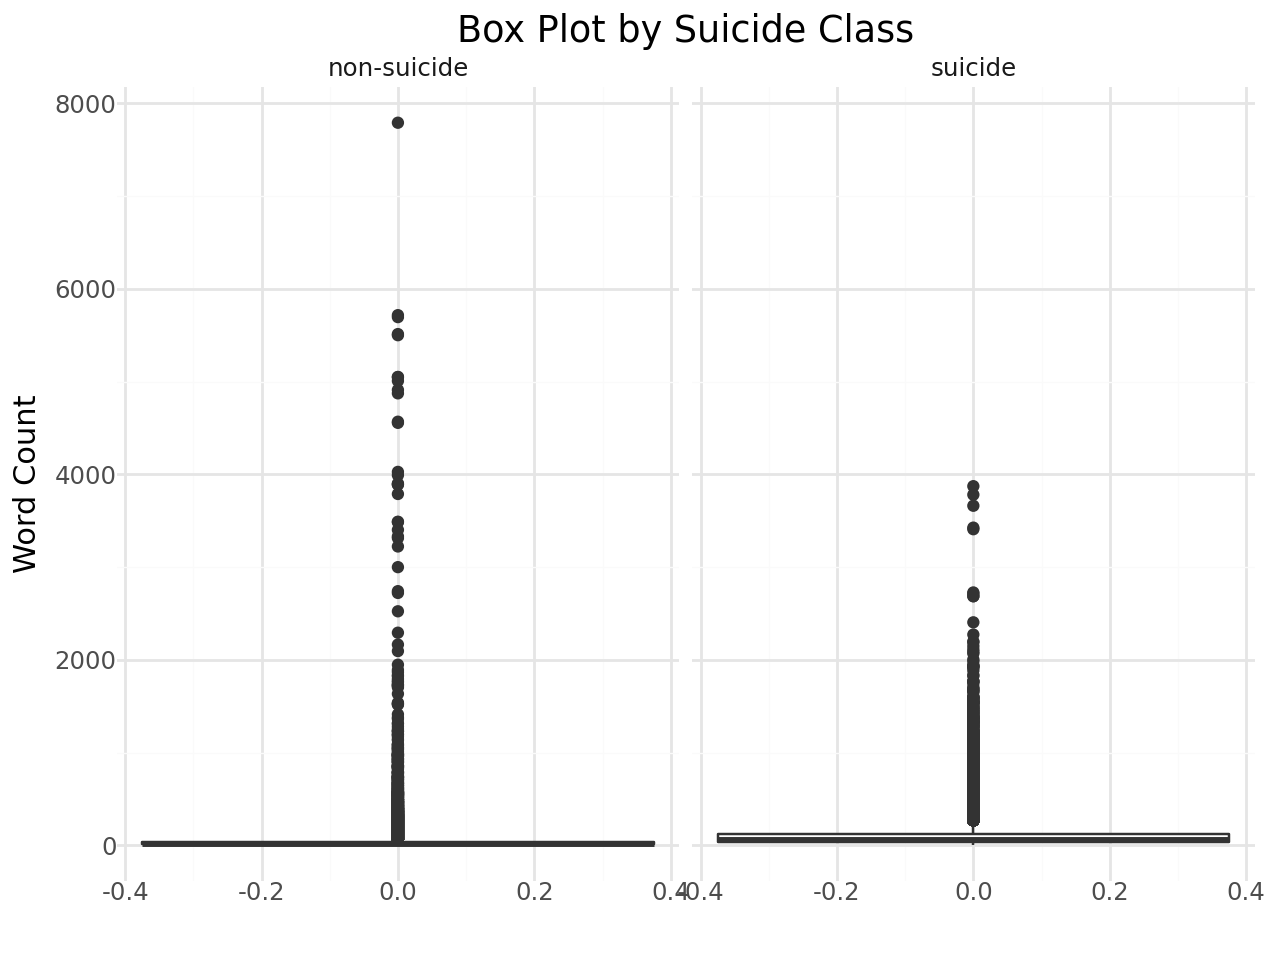

In [25]:
from plotnine import *
(SuicideDetection >>
 ggplot(aes(y='wordlength'))+
 geom_boxplot() +
 facet_wrap('~class') +
 theme_minimal() +
 labs(
     x = " ",
     y = "Word Count",
     title = "Box Plot by Suicide Class"
 )
)

In [17]:
SuicideDetection.describe()

,Unnamed: 0,wordlength
count,232074.000000,232074.000000
mean,174152.863518,67.489546
std,100500.425362,113.430810
min,2.000000,1.000000
25%,87049.250000,15.000000
50%,174358.500000,32.000000
75%,261285.750000,79.000000
max,348110.000000,7792.000000


In [22]:
SuicideDetection_Update = SuicideDetection[SuicideDetection['wordlength'] <= 200]

In [23]:
SuicideDetection_Update.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216087 entries, 0 to 232073
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    216087 non-null  int64 
 1   text          216087 non-null  object
 2   class         216087 non-null  object
 3   text_updated  216087 non-null  object
 4   wordlength    216087 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ MB


In [24]:
SuicideDetection_Update.to_csv('SuicideDetection_Update.csv', index=False)